# K-means Clustering

In [1]:
import scipy.io
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Implementing K-means
### Finding closest centroids

In [2]:
def find_closest_centroid(X, centroids):
    idx = np.zeros((X.shape[0],1))
    for i in range(X.shape[0]):
        idx[i] = np.argmin(np.sqrt(np.sum((X[i,:]-centroids)**2, axis = 1)))+1 #this gives the indice of the minimum of the centroids
    return idx #which decide which centroid our data point belongs to

In [3]:
mat = scipy.io.loadmat('Data/ex7data2.mat') #Loads the data
mat.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X'])

In [4]:
K = 3
initial_centroids = np.array([[3,3],[6,2],[8,5]]) #initializing random centroid for testing
idx = find_closest_centroid(mat['X'], initial_centroids)
print('Closest centroids for the first 3 examples:', idx[:3].T)
print('(the closest centroids should be 1, 3, 2 respectively)') 

Closest centroids for the first 3 examples: [[1. 3. 2.]]
(the closest centroids should be 1, 3, 2 respectively)


### Computing centroid means

In [5]:
def compute_centroids(X, idx, K):
    centroids = np.zeros((K, X.shape[1]))
    for i in range(K):
        centroids[i,:] = np.mean(X[(idx==i+1).T[0], :], axis=0) #this does the mean for the data point for each centroid
    return centroids

In [6]:
centroids = compute_centroids(mat['X'], idx, K)
print('Centroids computed after initial finding of closest centroids: \n', centroids)
print('\n(the centroids should be\n [ 2.428301 3.157924 ]\n[ 5.813503 2.633656 ]\n[ 7.119387 3.616684 ]')

Centroids computed after initial finding of closest centroids: 
 [[2.42830111 3.15792418]
 [5.81350331 2.63365645]
 [7.11938687 3.6166844 ]]

(the centroids should be
 [ 2.428301 3.157924 ]
[ 5.813503 2.633656 ]
[ 7.119387 3.616684 ]


### K-means on example dataset

In [7]:
def plot_kmeans(X, centroids, previous, idx, K, axes):
    for i, ax in enumerate(axes):
        sns.scatterplot(x=X[:,0], y=X[:,1], hue=idx.ravel(), legend=False, palette=['r', 'g', 'b'], ax=ax) #this is to plot the data points
        if i==0:
            sns.scatterplot(x=centroids[:,0], y=centroids[:,1], marker='X', color='k', legend=False, s=100, ax=ax) 
        else:
            sns.scatterplot(x=centroids[:,0], y=centroids[:,1], marker='X', color='k', legend=False, s=100, ax=ax) #this is to plot the path of the centroids
        for i in range(centroids.shape[0]):
            ax.plot([centroids[i,0], previous[i,0]], [centroids[i,1], previous[i,1]], '--k');

In [8]:
def kmeans(X, initial_centroids, max_iters, plot_progress):
    if plot_progress:
        ncols = 3
        nrows = int(max_iters/ncols)
        if max_iters % ncols > 0:
            nrows = nrows + 1
        fig, axes = plt.subplots(nrows=nrows,ncols=ncols,figsize=(20,nrows*8))
        ax_tuple = list(np.ndindex(nrows,ncols))
        for ax in ax_tuple[max_iters:]:
            axes[ax].set_axis_off()
        ax_tuple = ax_tuple[:max_iters]
        
    K = initial_centroids.shape[0]
    centroids = initial_centroids
    previous_centroids = centroids

    for i in range(max_iters):
        idx = find_closest_centroid(X, centroids)
        
        if plot_progress:
            plot_axes = [axes[axi] for axi in ax_tuple[i:]]
            axes[ax_tuple[i]].set_title('K-Means iteration {0}/{1}'.format(i+1, max_iters))
            plot_kmeans(X, centroids, previous_centroids, idx, K, plot_axes)
            previous_centroids = centroids
            previous_ax = plt.gca()
        else:
            print('K-Means iteration {0}/{1}'.format(i+1, max_iters))
        centroids = compute_centroids(X, idx, K)
    
    if plot_progress:
        plt.show()
    return centroids, idx


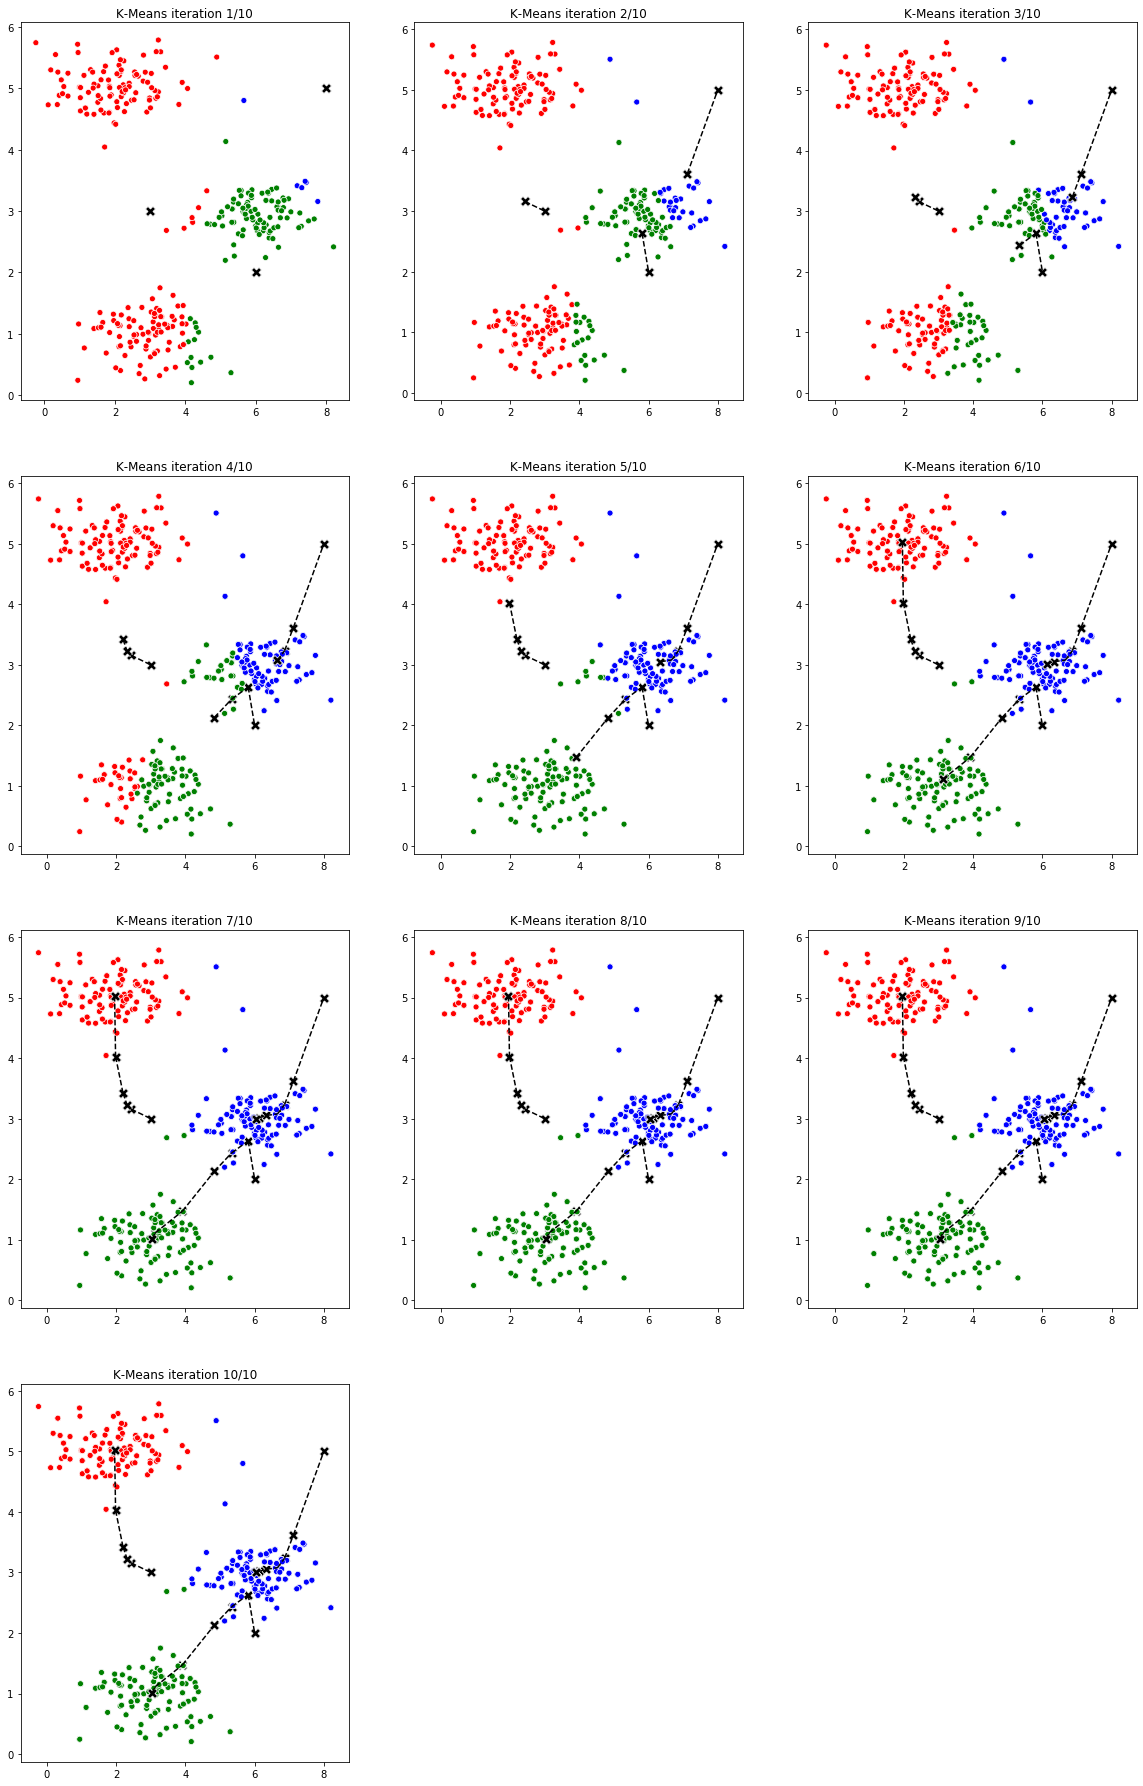

In [9]:
K = 3
max_iters = 10
initial_centroids = np.array([[3,3],[6,2],[8,5]])
centroids, idx = kmeans(mat['X'], initial_centroids, max_iters,True)

## Random Initialization

In [10]:
def init_random_centroids(X, K):
    centroids = X[(np.random.choice(X.shape[0], K)), :]
    return centroids

 ## Image compression with K-means

#### Load image

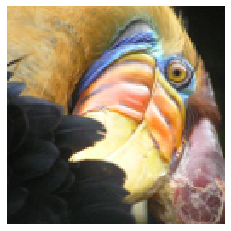

In [11]:
import cv2
img = cv2.imread('Data/bird_small.png')  #this is to load image
plt.axis('off'); #turns off the axis details
plt.imshow(img[:,:,::-1]);

In [12]:
A = img[:,:,::-1]
A = np.divide(img, 255) #get all values in range 0-1

In [13]:
A.shape

(128, 128, 3)

In [14]:
A = A.reshape((A.shape[0]*A.shape[1], 3))

In [15]:
A.shape

(16384, 3)

### run K-means

In [16]:
K = 16
max_iters = 10
initial_centroids = init_random_centroids(A, K)
centroids, idx = kmeans(A, initial_centroids, max_iters,False)

K-Means iteration 1/10
K-Means iteration 2/10
K-Means iteration 3/10
K-Means iteration 4/10
K-Means iteration 5/10
K-Means iteration 6/10
K-Means iteration 7/10
K-Means iteration 8/10
K-Means iteration 9/10
K-Means iteration 10/10


### Apply K-means to compress an image

In [17]:
idx = find_closest_centroid(A, centroids)
idx = idx.astype(int)

In [18]:
idx.shape

(16384, 1)

In [19]:
X_recovered = np.zeros((idx.shape[0], 3))
for i in range(idx.shape[0]):
    X_recovered[i,:] = centroids[idx[i]-1,:]

In [20]:
X_recovered = X_recovered.reshape((img.shape[0], img.shape[1], 3))

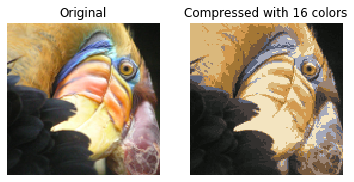

In [21]:
plt.subplot(1,2,1)
plt.axis('off');
plt.title('Original')
plt.imshow(img[:,:,::-1]);

plt.subplot(1,2,2)
plt.axis('off');
plt.title('Compressed with 16 colors')
plt.imshow(X_recovered[:,:,::-1]);

In [22]:
K_vals = [2, 8, 16, 24, 36]
max_iters = 10

imgs_compressed = []        
for ik,K in enumerate(K_vals):
    print('\nRunning K-Means with K={}'.format(K))
    #run kmeans
    initial_centroids = init_random_centroids(A, K)
    centroids, idx = kmeans(A, initial_centroids, max_iters, False)
    #image compression
    idx = find_closest_centroid(A, centroids)
    idx = idx.astype(int)
    #recover image
    X_recovered = np.zeros((idx.shape[0], 3))
    for i in range(idx.shape[0]):
        X_recovered[i,:] = centroids[idx[i]-1,:]
    X_recovered = X_recovered.reshape((img.shape[0], img.shape[1], 3))
    imgs_compressed.append(X_recovered)


Running K-Means with K=2
K-Means iteration 1/10
K-Means iteration 2/10
K-Means iteration 3/10
K-Means iteration 4/10
K-Means iteration 5/10
K-Means iteration 6/10
K-Means iteration 7/10
K-Means iteration 8/10
K-Means iteration 9/10
K-Means iteration 10/10

Running K-Means with K=8
K-Means iteration 1/10
K-Means iteration 2/10
K-Means iteration 3/10
K-Means iteration 4/10
K-Means iteration 5/10
K-Means iteration 6/10
K-Means iteration 7/10
K-Means iteration 8/10
K-Means iteration 9/10
K-Means iteration 10/10

Running K-Means with K=16
K-Means iteration 1/10
K-Means iteration 2/10
K-Means iteration 3/10
K-Means iteration 4/10
K-Means iteration 5/10
K-Means iteration 6/10
K-Means iteration 7/10
K-Means iteration 8/10
K-Means iteration 9/10
K-Means iteration 10/10

Running K-Means with K=24
K-Means iteration 1/10
K-Means iteration 2/10
K-Means iteration 3/10
K-Means iteration 4/10
K-Means iteration 5/10
K-Means iteration 6/10
K-Means iteration 7/10
K-Means iteration 8/10
K-Means iteration

C:\Users\Subhojit Misra\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\Subhojit Misra\anaconda3\lib\site-packages\numpy\core\_methods.py:154: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


K-Means iteration 2/10
K-Means iteration 3/10
K-Means iteration 4/10
K-Means iteration 5/10
K-Means iteration 6/10
K-Means iteration 7/10
K-Means iteration 8/10
K-Means iteration 9/10
K-Means iteration 10/10


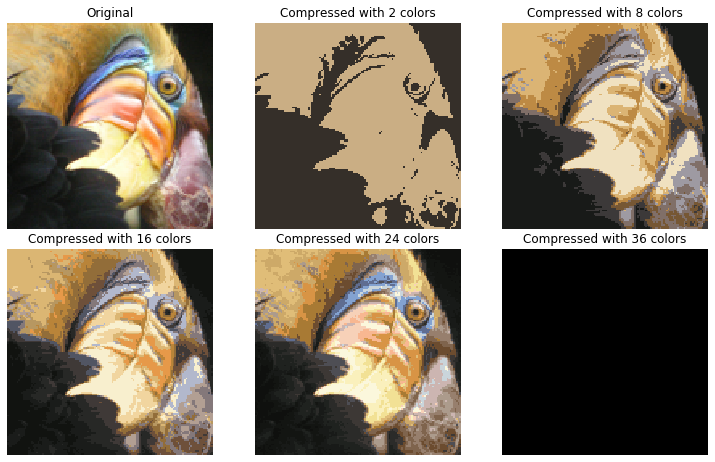

In [23]:
fig = plt.figure(figsize=(10,6))
rows = 2
cols = 3
ax1 = fig.add_subplot(rows, cols, 1)
ax1.imshow(img[:,:,::-1])
ax1.set_axis_off()
ax1.set_title('Original')
for i in range(len(imgs_compressed)):
    ax1 = fig.add_subplot(rows, cols, i+2)
    ax1.imshow(imgs_compressed[i][:,:,::-1])
    ax1.set_axis_off()
    ax1.set_title('Compressed with {} colors'.format(K_vals[i]))
plt.subplots_adjust(wspace=.1, hspace=.1, left=0, right=1, bottom=0, top=1)
plt.show()

## PCA

### Example dataset

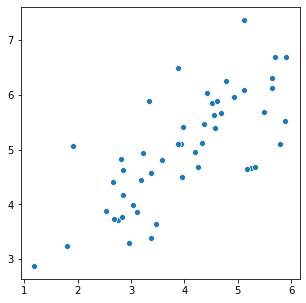

In [24]:
mat = scipy.io.loadmat('data/ex7data1.mat')
plt.figure(figsize=(5,5))
sns.scatterplot(x=mat['X'][:,0], y=mat['X'][:,1])

### Implementing pca

In [25]:
def feature_normalize(X):
    mean = np.mean(X, axis=0)
    X_norm = np.subtract(X,mean)
    
    std = np.std(X_norm, axis=0, ddof=1)
    X_norm = X_norm/std
    return X_norm, mean, std

In [26]:
def pca(X):
    m = X.shape[0]
    covariance_matrix = (1/m) * (X.T.dot(X))
    U, S, _ = np.linalg.svd(covariance_matrix)
    return U, S

In [27]:
X_norm, mu, sigma = feature_normalize(mat['X'])

In [28]:
U, S = pca(X_norm)

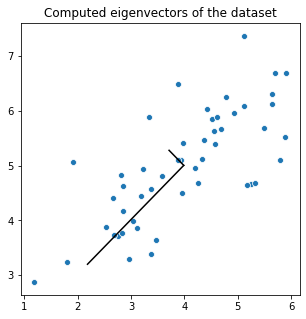

In [29]:
plt.figure(figsize=(5,5))
ax = sns.scatterplot(x=mat['X'][:,0], y=mat['X'][:,1])

p1 = mu
p2 = mu + 1.5 * S[0] * U[:,0].T
ax.plot([p1[0], p2[0]], [p1[1], p2[1]], 'k');  

p1 = mu
p2 = mu + 1.5 * S[1] * U[:,1].T
ax.plot([p1[0], p2[0]], [p1[1], p2[1]], 'k');  
plt.title('Computed eigenvectors of the dataset');

In [30]:
print('Top eigenvector:')
print(' U(:,1) = ', U[0,0], U[1,0])
print('(you should expect to see -0.707107 -0.707107)')

Top eigenvector:
 U(:,1) =  -0.7071067811865475 -0.7071067811865477
(you should expect to see -0.707107 -0.707107)


### Dimensionality reduction with PCA

In [31]:
#Projecting the data onto the principal components
def project_data(X, U, K):
    Z = np.zeros((X.shape[0], K))
    for i in range(X.shape[0]):
        x = X[i,:].T
        for j in range(K):
            Z[i,j] = x.T.dot(U[:,j])
    return Z

In [32]:
K=1
Z = project_data(X_norm, U, K)
print('Projection of the first example:', Z[0])
print('(this value should be about 1.481274)')

Projection of the first example: [1.48127391]
(this value should be about 1.481274)


In [33]:
#Reconstructing an approximation of the data
def recover_data(Z, U, K):
    X_rec = np.zeros((Z.shape[0], U.shape[0]))
    for i in range(Z.shape[0]):
        z = Z[i,:].T
        for j in range(U.shape[0]):
            X_rec[i,j] = z.T.dot(U[j,:K])
    return X_rec

In [34]:
X_rec = recover_data(Z, U, K)
print('Approximation of the first example:', X_rec[0, 0], X_rec[0, 1])
print('(this value should be about  -1.047419 -1.047419)')

Approximation of the first example: -1.0474188259204964 -1.0474188259204966
(this value should be about  -1.047419 -1.047419)


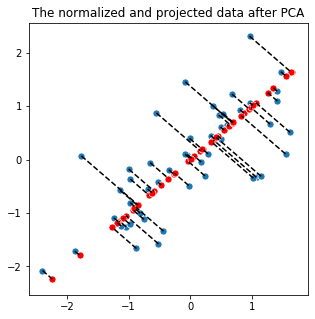

In [35]:
#Visualizing the projections
plt.figure(figsize=(5,5))
ax = sns.scatterplot(x=X_norm[:,0], y=X_norm[:,1], s=50)
ax = sns.scatterplot(x=X_rec[:,0], y=X_rec[:,1], color='r', s=50)
for i in range(X_norm.shape[0]):
    p1 = X_norm[i,:]
    p2 = X_rec[i,:]
    ax.plot([p1[0], p2[0]], [p1[1], p2[1]], '--k')
plt.title('The normalized and projected data after PCA');

### Face image dataset

In [36]:
mat = scipy.io.loadmat('Data/ex7faces.mat')

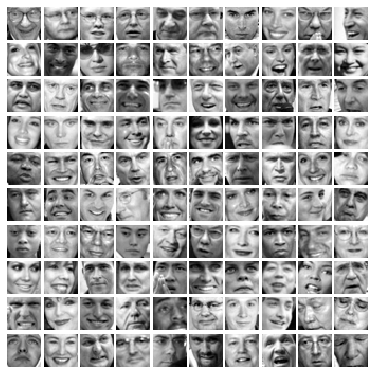

In [37]:
rows = 10
cols = 10
fig = plt.figure(figsize=(5,5))
count = 0
for i in range(0,rows):
    for j in range(0,cols):
        ax1 = fig.add_subplot(rows, cols, count+1)
        ax1.imshow(mat['X'][count].reshape(32,32).T, cmap='gray')
        ax1.autoscale(False)
        ax1.set_axis_off()
        count+=1
plt.subplots_adjust(wspace=.1, hspace=.1, left=0, right=1, bottom=0, top=1)
plt.show()

In [38]:
X_norm, mu, sigma = feature_normalize(mat['X'])

In [39]:
U, S = pca(X_norm)

In [40]:
U.shape

(1024, 1024)

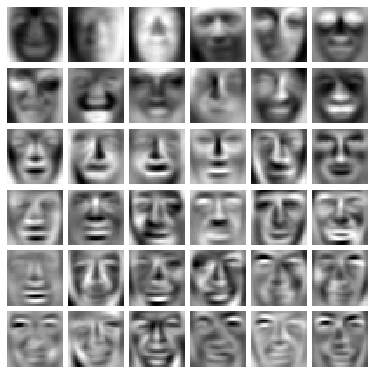

In [41]:
rows = 6
cols = 6
fig = plt.figure(figsize=(5,5))
count = 0
for i in range(rows):
    for j in range(cols):
        ax1 = fig.add_subplot(rows, cols, count+1)
        ax1.imshow(U[:, count].T.reshape(32,32).T, cmap='gray')
        ax1.autoscale(False)
        ax1.set_axis_off()
        count+=1
plt.subplots_adjust(wspace=.1, hspace=.1, left=0, right=1, bottom=0, top=1)
plt.show()

In [42]:
# Dimensionality Reduction
K=100
Z = project_data(X_norm, U, K)

In [43]:
print('The projected data Z has a size of: ', Z.shape)

The projected data Z has a size of:  (5000, 100)


In [44]:
X_rec  = recover_data(Z, U, K)

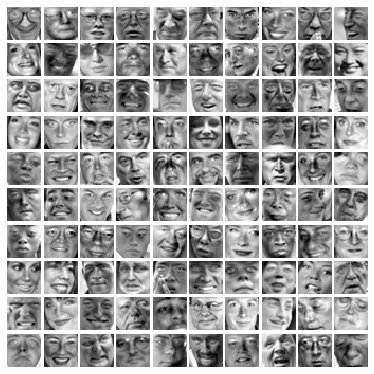

In [45]:
rows = 10
cols = 10
fig = plt.figure(figsize=(5,5))
count = 0
for i in range(rows):
    for j in range(cols):
        ax1 = fig.add_subplot(rows, cols, count+1)
        ax1.imshow(X_norm[count].reshape(32,32).T, cmap='gray')
        ax1.autoscale(False)
        ax1.set_axis_off()
        count+=1
plt.subplots_adjust(wspace=.1, hspace=.1, left=0, right=1, bottom=0, top=1)
plt.show()

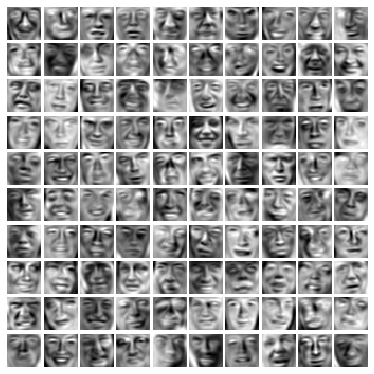

In [46]:
rows = 10
cols = 10
fig = plt.figure(figsize=(5,5))
count = 0
for i in range(rows):
    for j in range(cols):
        ax1 = fig.add_subplot(rows, cols, count+1)
        ax1.imshow(X_rec[count].reshape(32,32).T, cmap='gray')
        ax1.autoscale(False)
        ax1.set_axis_off()
        count+=1
plt.subplots_adjust(wspace=.1, hspace=.1, left=0, right=1, bottom=0, top=1)
plt.show()

### PCA for visualization

In [47]:
img = cv2.imread('data/bird_small.png')

A = img[:,:,::-1]
A = np.divide(img, 255) #get all values in range 0-1

A = A.reshape((A.shape[0]*A.shape[1], 3), order='F')

K = 16
max_iters = 10
initial_centroids = init_random_centroids(A, K)
centroids, idx = kmeans(A, initial_centroids, max_iters, False)

K-Means iteration 1/10
K-Means iteration 2/10
K-Means iteration 3/10
K-Means iteration 4/10
K-Means iteration 5/10
K-Means iteration 6/10
K-Means iteration 7/10
K-Means iteration 8/10
K-Means iteration 9/10
K-Means iteration 10/10


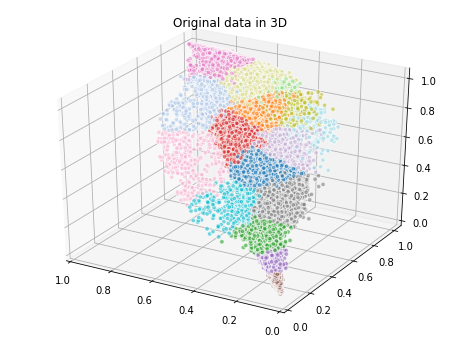

In [48]:
from mpl_toolkits.mplot3d.axes3d import get_test_data
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(A[:,0], A[:,1], A[:,2], alpha=0.6, edgecolors='w', c=idx.ravel(), cmap=plt.get_cmap("tab20"))
ax.set_xlim(1, 0)

plt.title('Original data in 3D');
plt.show()

In [49]:
X_norm, mu, sigma = feature_normalize(A)
U, S = pca(X_norm)
Z = project_data(X_norm, U, 2)

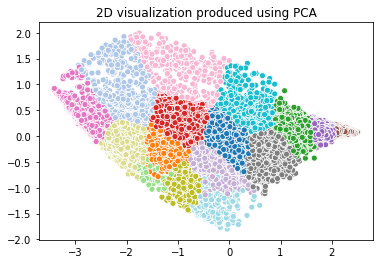

In [50]:
sns.scatterplot(x=Z[:,0], y=Z[:,1], hue=idx.ravel(), legend=False, palette=plt.get_cmap("tab20"))
plt.title('2D visualization produced using PCA');